In [126]:
# loading packages and libraries

import os
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error


In [127]:
# Load the data
df = pd.read_csv(r'C:\Users\zbqgrd\Documents\Taitanic_ML\taitanicEnv\data\train.csv')
#test = pd.read_csv(r'C:\Users\zbqgrd\Documents\Taitanic_ML\taitanicEnv\data\test.csv')

In [128]:
# Data Exploration 
## Data shape
print(df.shape)

# checking columns
print(df.columns)

# glimpse train and test dataset
df.head(3)
df.describe()


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
# check NAs 
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


[Text(0.5, 1.0, 'By Number of Survivals')]

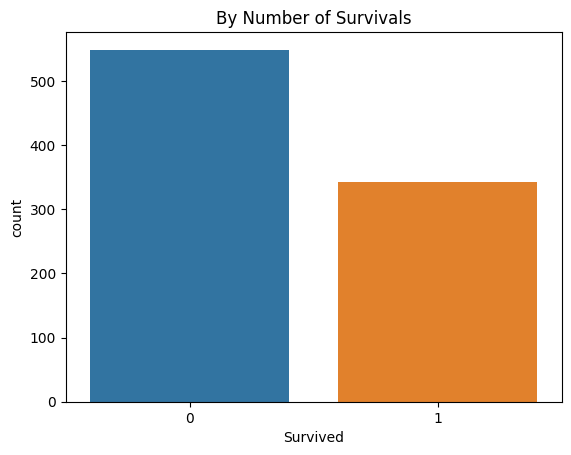

In [130]:
# Let's visualize 
sns.countplot(data=df, x='Survived').set(title='By Number of Survivals')

[Text(0.5, 1.0, 'By Sex')]

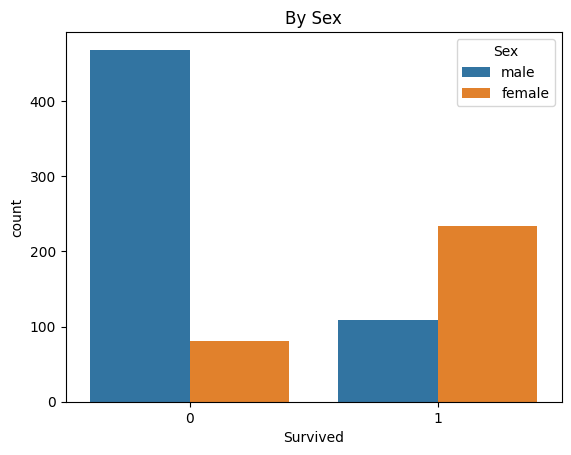

In [131]:
sns.countplot(x='Survived',hue='Sex',data=df).set(title='By Sex')


[Text(0.5, 1.0, 'By Class Type')]

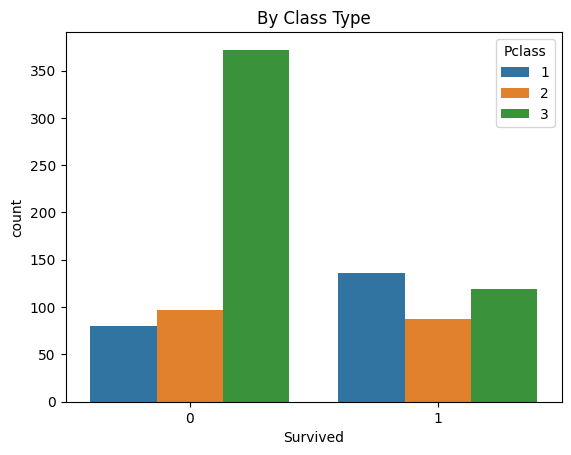

In [132]:
# by class type 
sns.countplot(df, x='Survived', hue='Pclass').set(title='By Class Type')

In [133]:
# value_counts
df['Survived'].value_counts()
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [134]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

[Text(0.5, 1.0, 'Age Histogram')]

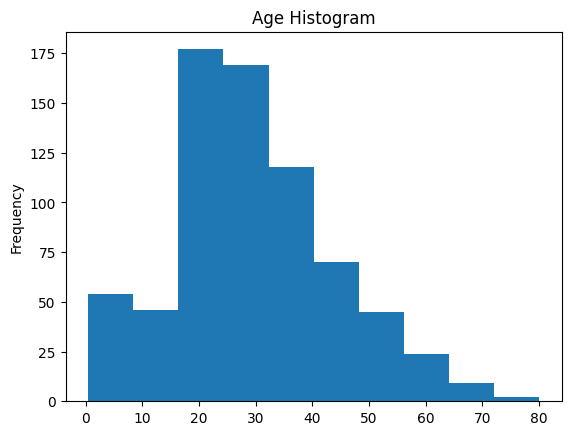

In [135]:
# Age Histogram 
from matplotlib.pyplot import title


df['Age'].plot.hist().set(title='Age Histogram')

In [136]:
df['Age'].value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

[Text(0.5, 1.0, 'Boxplot by Age')]

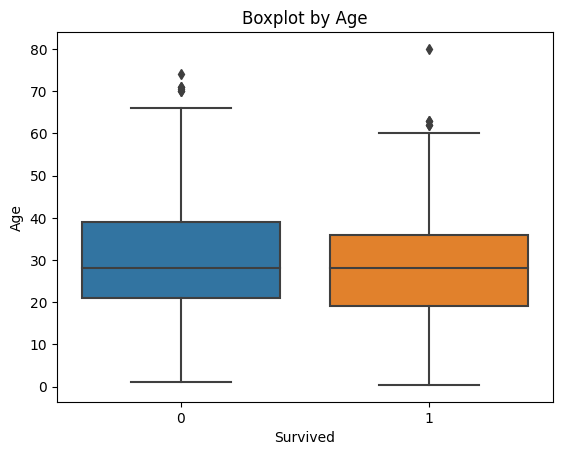

In [137]:
# boxplots 
sns.boxplot(df, x='Survived', y='Age').set(title="Boxplot by Age")

[Text(0.5, 1.0, 'Boxplot by sex and age')]

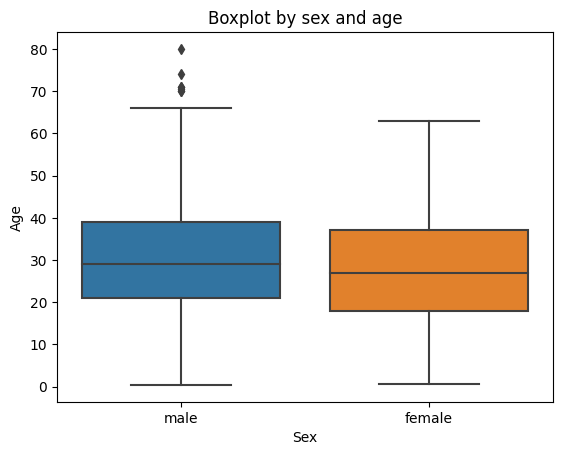

In [138]:
# boxplot by Sex and age
sns.boxplot(df, x='Sex', y='Age').set(title='Boxplot by sex and age')

Okay that's probably enough of general visualizations! Let's move on to checking the data set. 

In [139]:
# Check total na of each variable
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Okay ... we see lots of data missing for Age and Cabin, only 2-data missing from Embarked. 
Since nearly all cabin data is missing, we will remvoe that variable. We don't have to worry about factor influence of survival since we still have enough target variables. 

In [140]:
df.drop('Cabin',axis=1,inplace=True)

In [141]:
df.head()
df.dropna(inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [142]:
#labeling sex 1:male, 0:female
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [143]:
df.drop(['PassengerId','Ticket','Embarked','Name','Fare'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


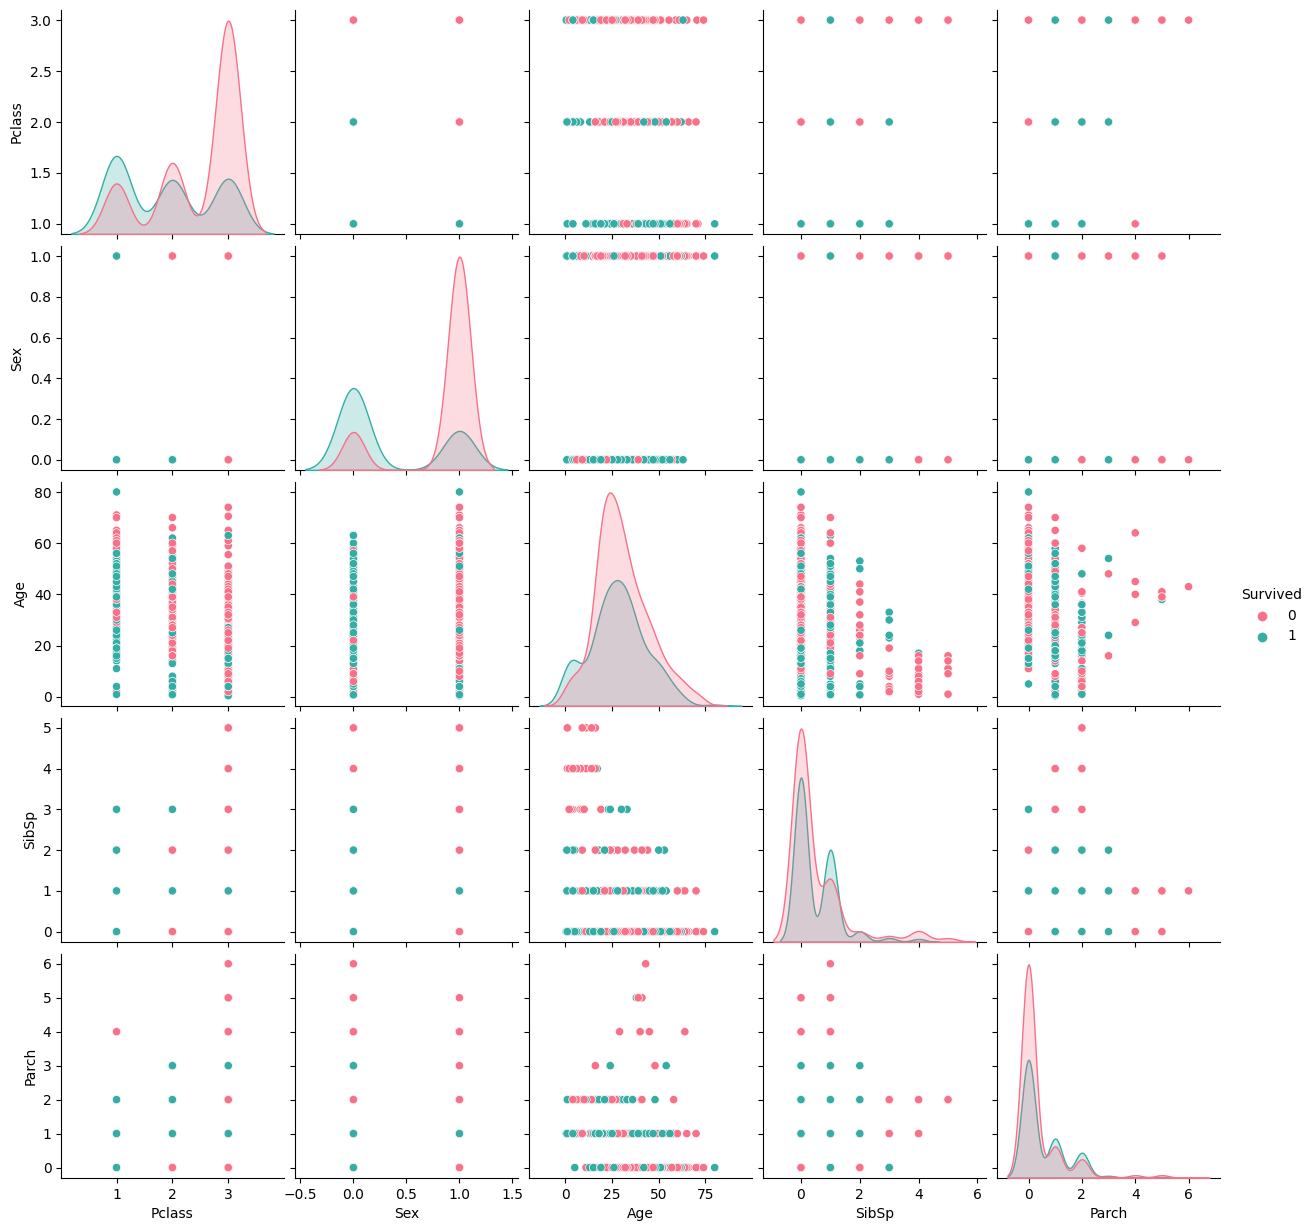

In [144]:
# pairewise plot
sns.pairplot(df, hue='Survived', diag_kind='kde', kind='scatter', palette='husl')

Not very helpful huh! 

<AxesSubplot: >

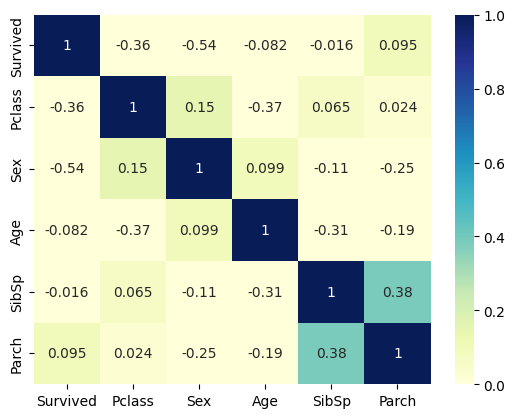

In [145]:
# heatmap 
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=0, vmax=1)

We see here there's higher positive correlation between Parch and SibSp, and higher negative relationship between Age and SibSp, Sex and Survived, and Pclass and Survived. 

Now, let's build the model. To do this, we first need to split the data and standardized our samples. 

In [166]:
# first drop 'Survived' 
X = df.drop(['Survived'], axis=1)
y = df['Survived']


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)


In [148]:
# Logistic Regression 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
log_model = linear_model.LogisticRegression()
log_model.fit(X_train, y_train) # fit the model on train

# prediction 
log_predict = log_model.predict(X_test)  # predict on X_test
accuracy = accuracy_score(y_test, log_predict)
print(accuracy)
 

0.7832167832167832


Logistic Regression has 78% accuracy. Not bad! Now, let's aim higher!

In [149]:
# Confusion matrix 
confusion_matrix(y_test, log_predict)

array([[68, 17],
       [14, 44]], dtype=int64)

In [150]:
# classification report 
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        85
           1       0.72      0.76      0.74        58

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.78      0.78       143



In [151]:
# create decsion tree classifier object 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# train DTC 
clf = clf.fit(X_train, y_train)

# predict response for test data
y_predict = clf.predict(X_test)

In [152]:
# Evaluating Decision Tree Classifier Model 
print(accuracy_score(y_test, y_predict))

0.7342657342657343


Well, we see 73.42% accuray for Decision Tree Classifier model. Let's see if we can improve it by tuning our parameter.

In [168]:
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.feature_importances_
pd.DataFrame(index=X.columns,data=clf.feature_importances_,columns=['Feature Importance'])

Accuracy: 0.7762237762237763


,Feature Importance
Pclass,0.246392
Sex,0.673045
Age,0.080563
SibSp,0.000000
Parch,0.000000


              precision    recall  f1-score   support

           0       0.73      0.98      0.84        85
           1       0.93      0.48      0.64        58

    accuracy                           0.78       143
   macro avg       0.83      0.73      0.74       143
weighted avg       0.82      0.78      0.76       143





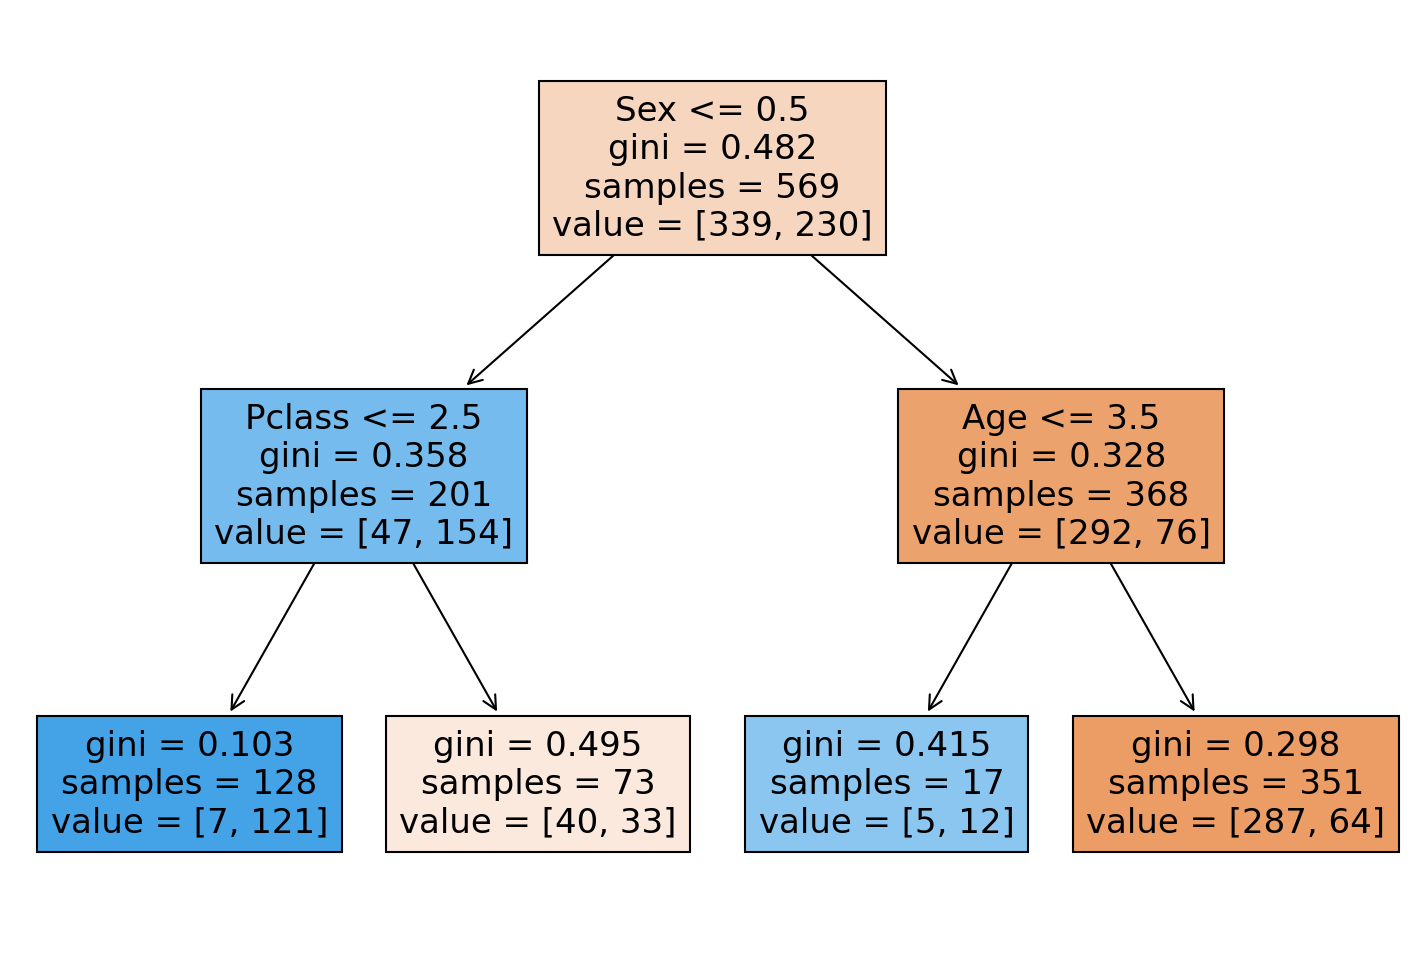

In [172]:
# Reporting model results
from sklearn.tree import plot_tree 

def report_model(clf):
    model_preds = clf.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(clf, filled=True,feature_names=X.columns);

# prunning the tree 
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.73      0.98      0.83        85
           1       0.93      0.47      0.62        58

    accuracy                           0.77       143
   macro avg       0.83      0.72      0.73       143
weighted avg       0.81      0.77      0.75       143





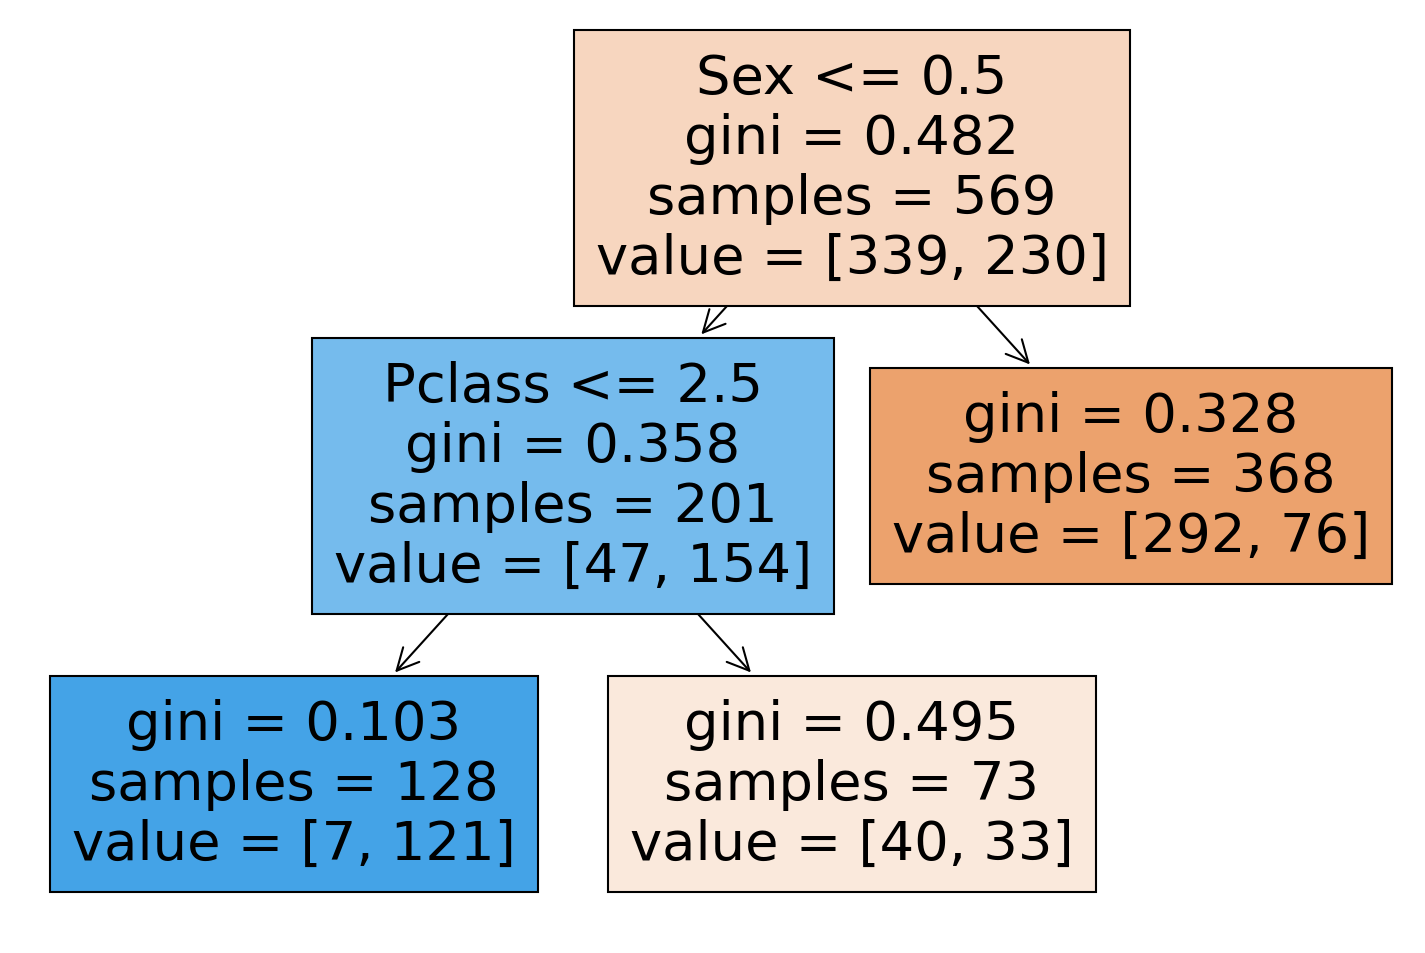

In [178]:
# what about we prunned the leaves
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train) 

report_model(pruned_tree)

Still can't beat Logistic. So, the best model would be using logistic which is simple and easy to understand as well, plus we have 78% accuracy. We will not use decision tree classifier since it's kind of unstable, we see that there are only 3 actual important features. We could cut down the the features on Logistic model. Maybe that would improve our model accuracy. 